# Decision Tree Classifier

In [80]:
# Import modules
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [77]:
def get_dt_graph(dt, features):
    fig = plt.figure(figsize=(25,20))
    tree.plot_tree(dt, feature_names = features.columns, class_names = ['Not admitted', 'Admitted'],filled=True)

In [51]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [53]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,0.92,True
1,2,324,107,4,4.0,4.5,8.87,1,0.76,True
2,3,316,104,3,3.0,3.5,8.00,1,0.72,False
3,4,322,110,3,3.5,2.5,8.67,1,0.80,True
4,5,314,103,2,2.0,3.0,8.21,0,0.65,False
5,6,330,115,5,4.5,3.0,9.34,1,0.90,True
6,7,321,109,3,3.0,4.0,8.20,1,0.75,True
7,8,308,101,2,3.0,4.0,7.90,0,0.68,False
8,9,302,102,1,2.0,1.5,8.00,0,0.50,False
9,10,323,108,3,3.5,3.0,8.60,0,0.45,False


In [54]:
data.drop('Chance of Admit', axis=1, inplace=True)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
0,1,337,118,4,4.5,4.5,9.65,1,True
1,2,324,107,4,4.0,4.5,8.87,1,True
2,3,316,104,3,3.0,3.5,8.00,1,False
3,4,322,110,3,3.5,2.5,8.67,1,True
4,5,314,103,2,2.0,3.0,8.21,0,False


In [55]:
features = data.drop('Admitted', axis=1)
labels = data['Admitted']

features.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


In [56]:
labels.head()

0     True
1     True
2    False
3     True
4    False
Name: Admitted, dtype: bool

In [57]:
dt = DecisionTreeClassifier()

In [58]:
dt.fit(features, labels)

DecisionTreeClassifier()

In [59]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

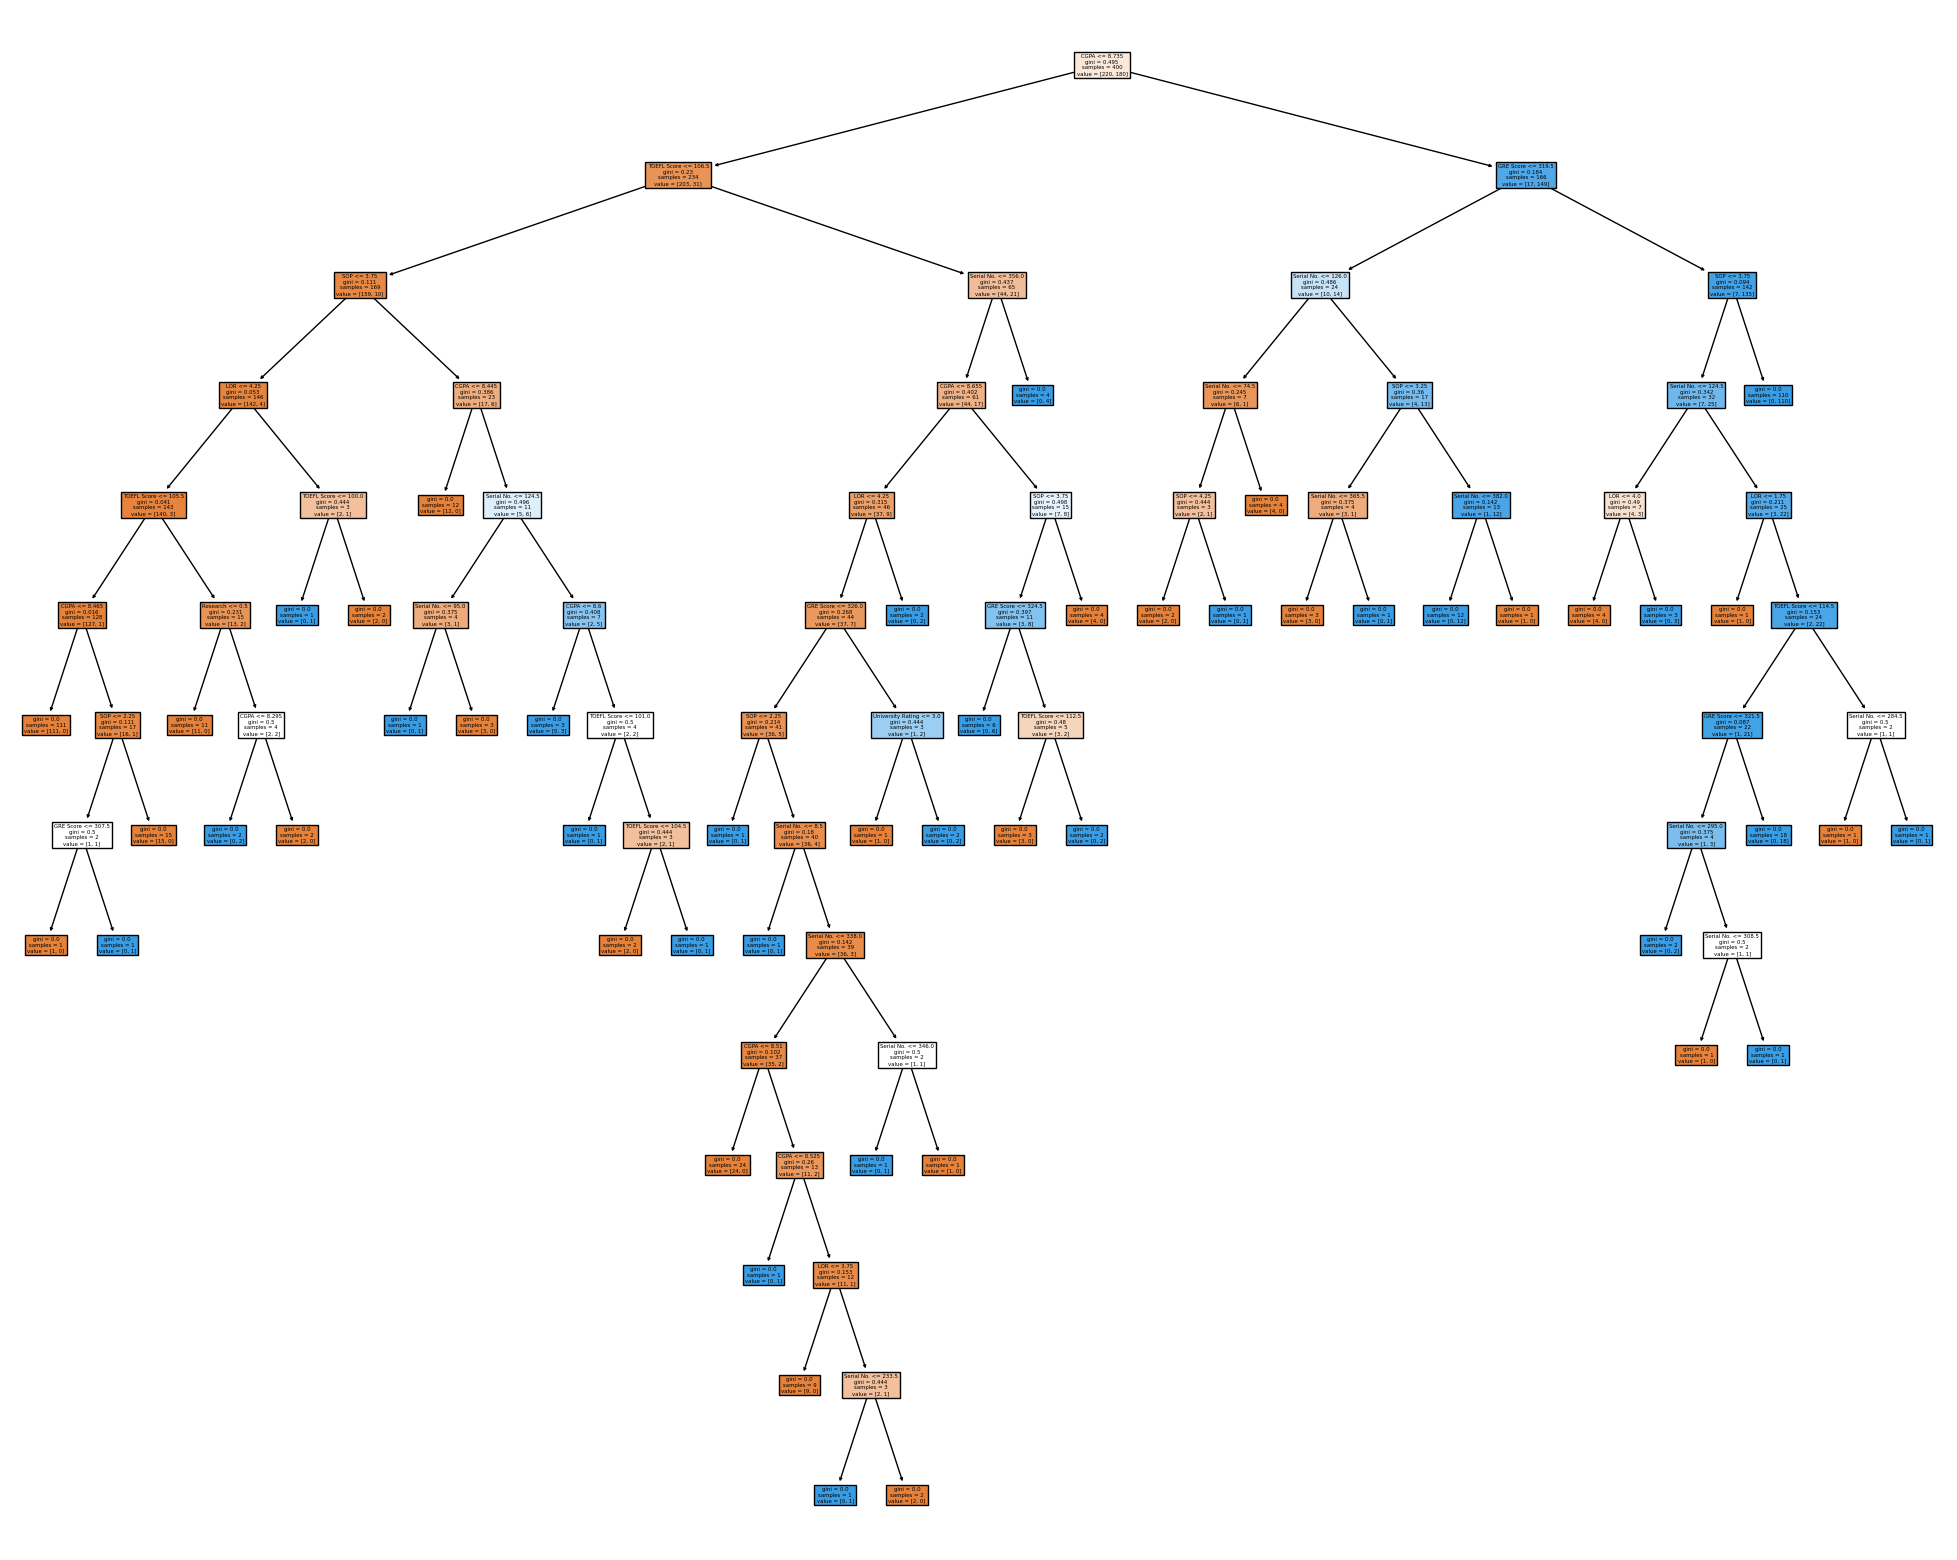

In [60]:
get_dt_graph(dt, features)

In [62]:
dt.score(features, labels)

1.0

This score suggest there is overfitting

## Setting hyperparameter

In [63]:
labels.head()

0     True
1     True
2    False
3     True
4    False
Name: Admitted, dtype: bool

In [71]:
#labels.replace(True, 1)
#labels.astype('int')

# Split the data
X_train, X_test, y_train ,y_test = train_test_split(features, labels, test_size=0.2)

In [67]:
# Setting hyperparameters
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [73]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [74]:
dt_model.score(X_train, y_train)

0.884375

In [75]:
dt_model.score(X_test, y_test)

0.8625

Similiar score results suggest, that there is no overfitting. The high score means, that our model explain about 86%-88% of variance in the data.

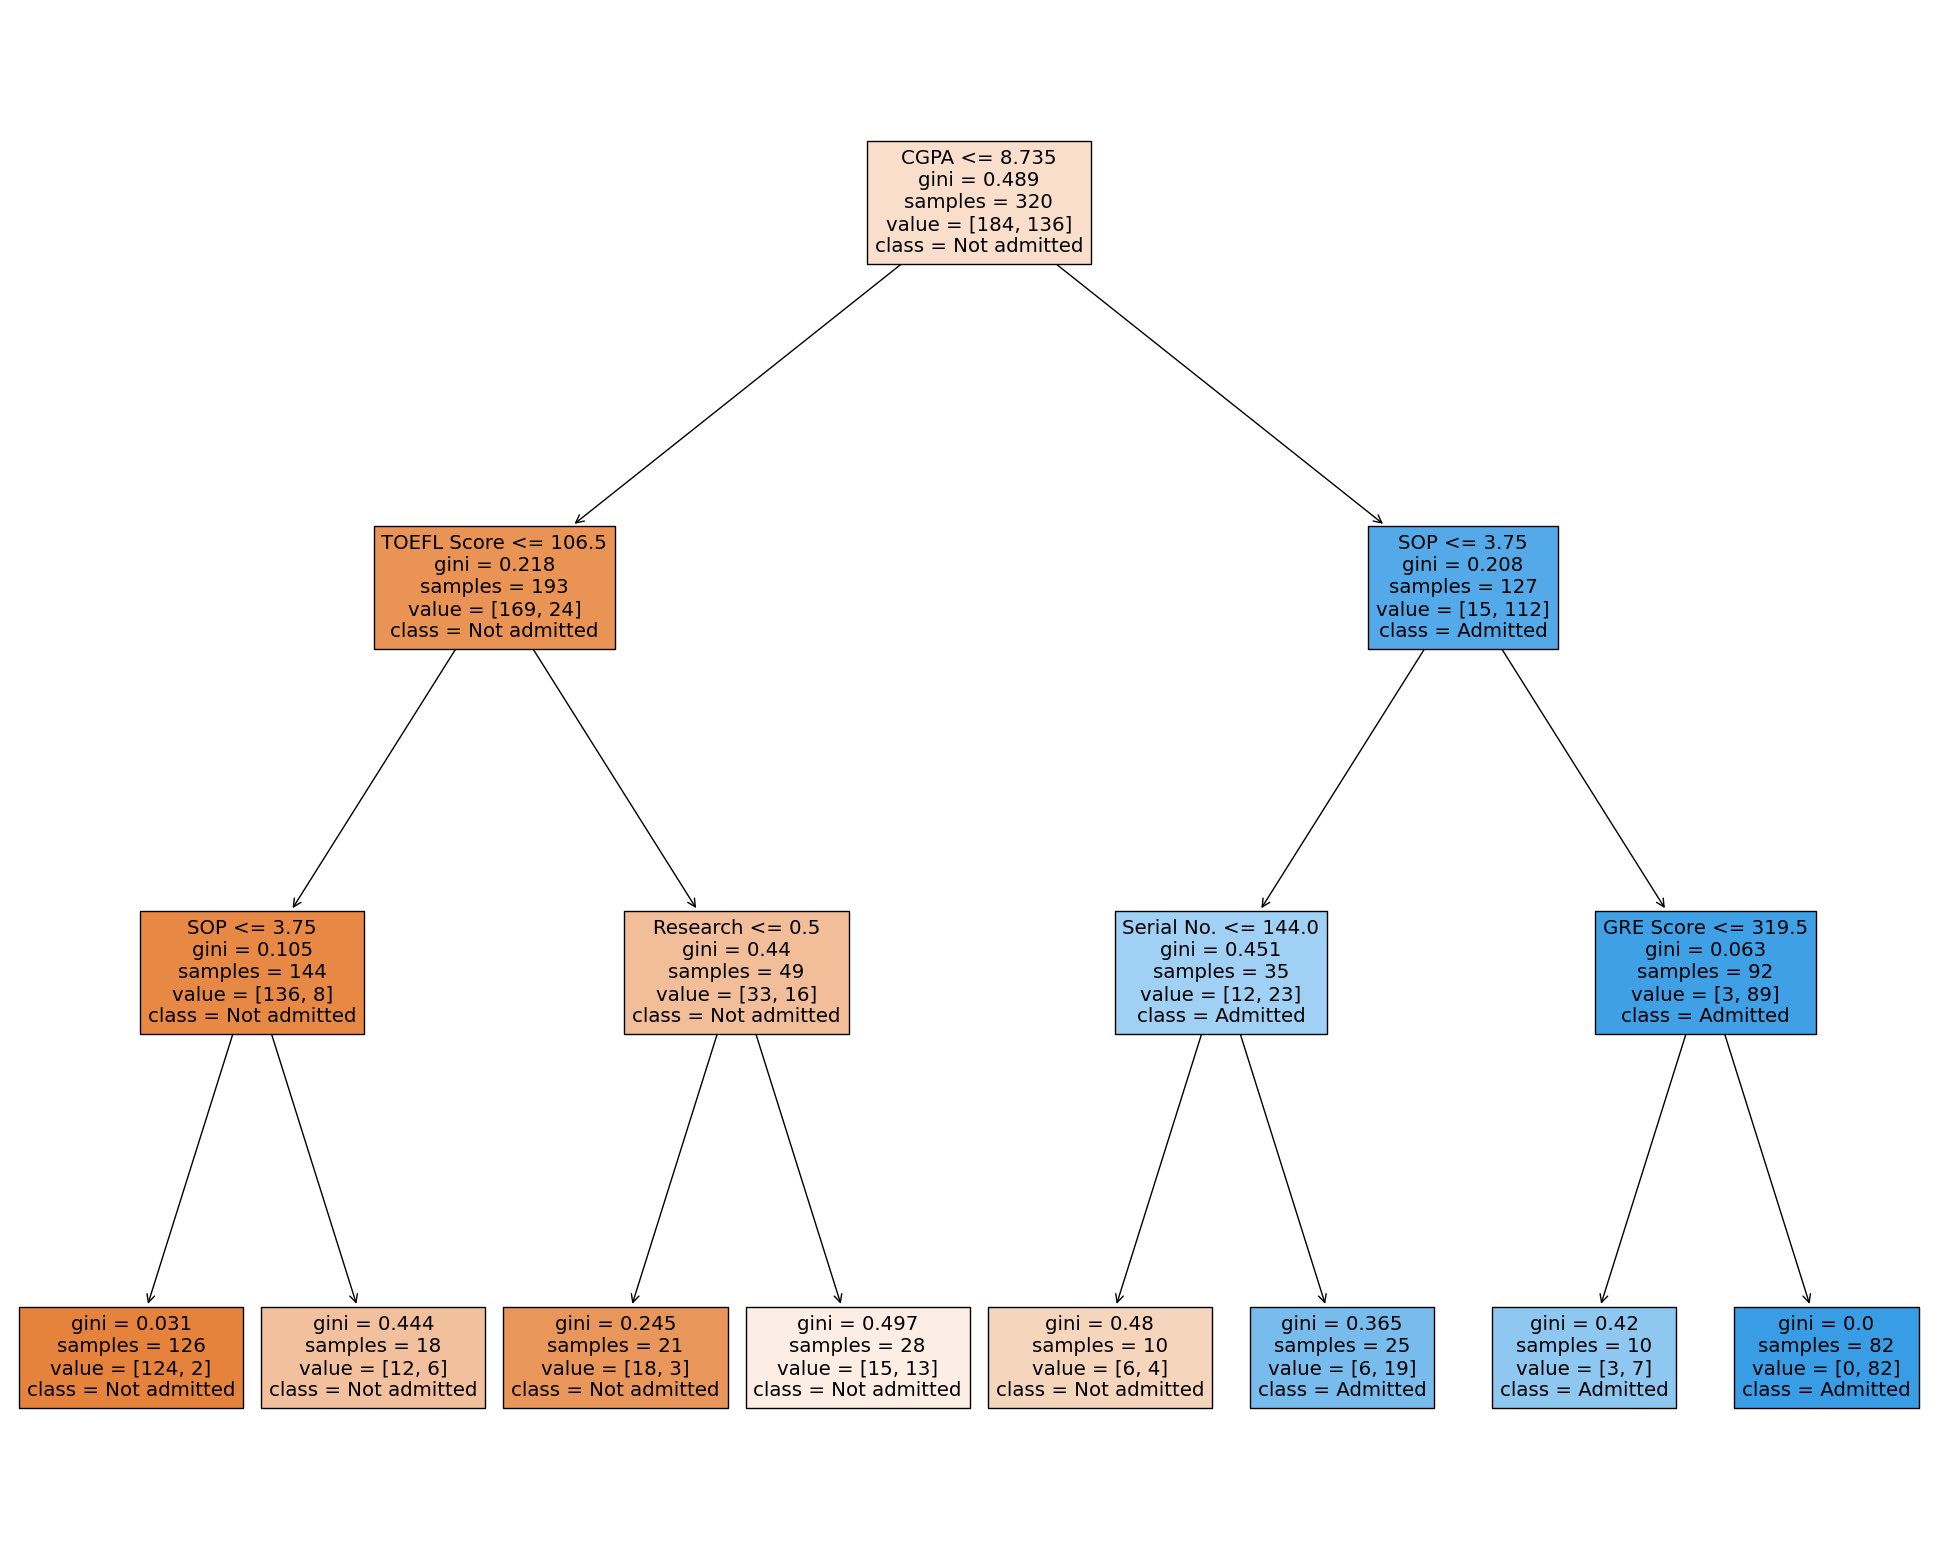

In [78]:
get_dt_graph(dt_model, X_train)

In [82]:
print(confusion_matrix(y_test, dt_model.predict(X_test)))

[[34  2]
 [ 9 35]]


In [81]:
print(classification_report(y_test, dt_model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.79      0.94      0.86        36
        True       0.95      0.80      0.86        44

    accuracy                           0.86        80
   macro avg       0.87      0.87      0.86        80
weighted avg       0.88      0.86      0.86        80



## Hyperparameter tuning

In [83]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [4, 8, 10, 15, 20],
    'criterion': ["gini", "entropy"]
}

In [84]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt_model, 
                          param_grid = params,
                          scoring = 'accuracy')

In [85]:
%%time
grid_search.fit(X_train, y_train)

CPU times: total: 641 ms
Wall time: 633 ms


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, min_samples_leaf=10,
                                              min_samples_split=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [4, 8, 10, 15, 20]},
             scoring='accuracy')

In [87]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002093,0.000548,0.001867,0.000424,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.8125,0.843750,0.90625,0.90625,0.8125,0.856250,0.042390,10
1,0.002186,0.000375,0.001399,0.000492,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.8125,0.843750,0.90625,0.90625,0.8125,0.856250,0.042390,10
2,0.001600,0.000490,0.001000,0.000002,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.8125,0.859375,0.90625,0.90625,0.8125,0.859375,0.041926,3
3,0.001207,0.000413,0.000778,0.000390,gini,2,15,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.8125,0.859375,0.90625,0.90625,0.8125,0.859375,0.041926,3
4,0.001415,0.000507,0.000799,0.000399,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.8125,0.859375,0.90625,0.90625,0.8125,0.859375,0.041926,3


In [88]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)

In [90]:
best = grid_search.best_estimator_

In [91]:
best.score(X_train, y_train)

0.934375

In [92]:
best.score(X_test, y_test)

0.8625

In [93]:
confusion_matrix(y_test, best.predict(X_test))

array([[32,  4],
       [ 7, 37]], dtype=int64)

In [94]:
print(classification_report(y_test, best.predict(X_test)))

              precision    recall  f1-score   support

       False       0.82      0.89      0.85        36
        True       0.90      0.84      0.87        44

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.87      0.86      0.86        80



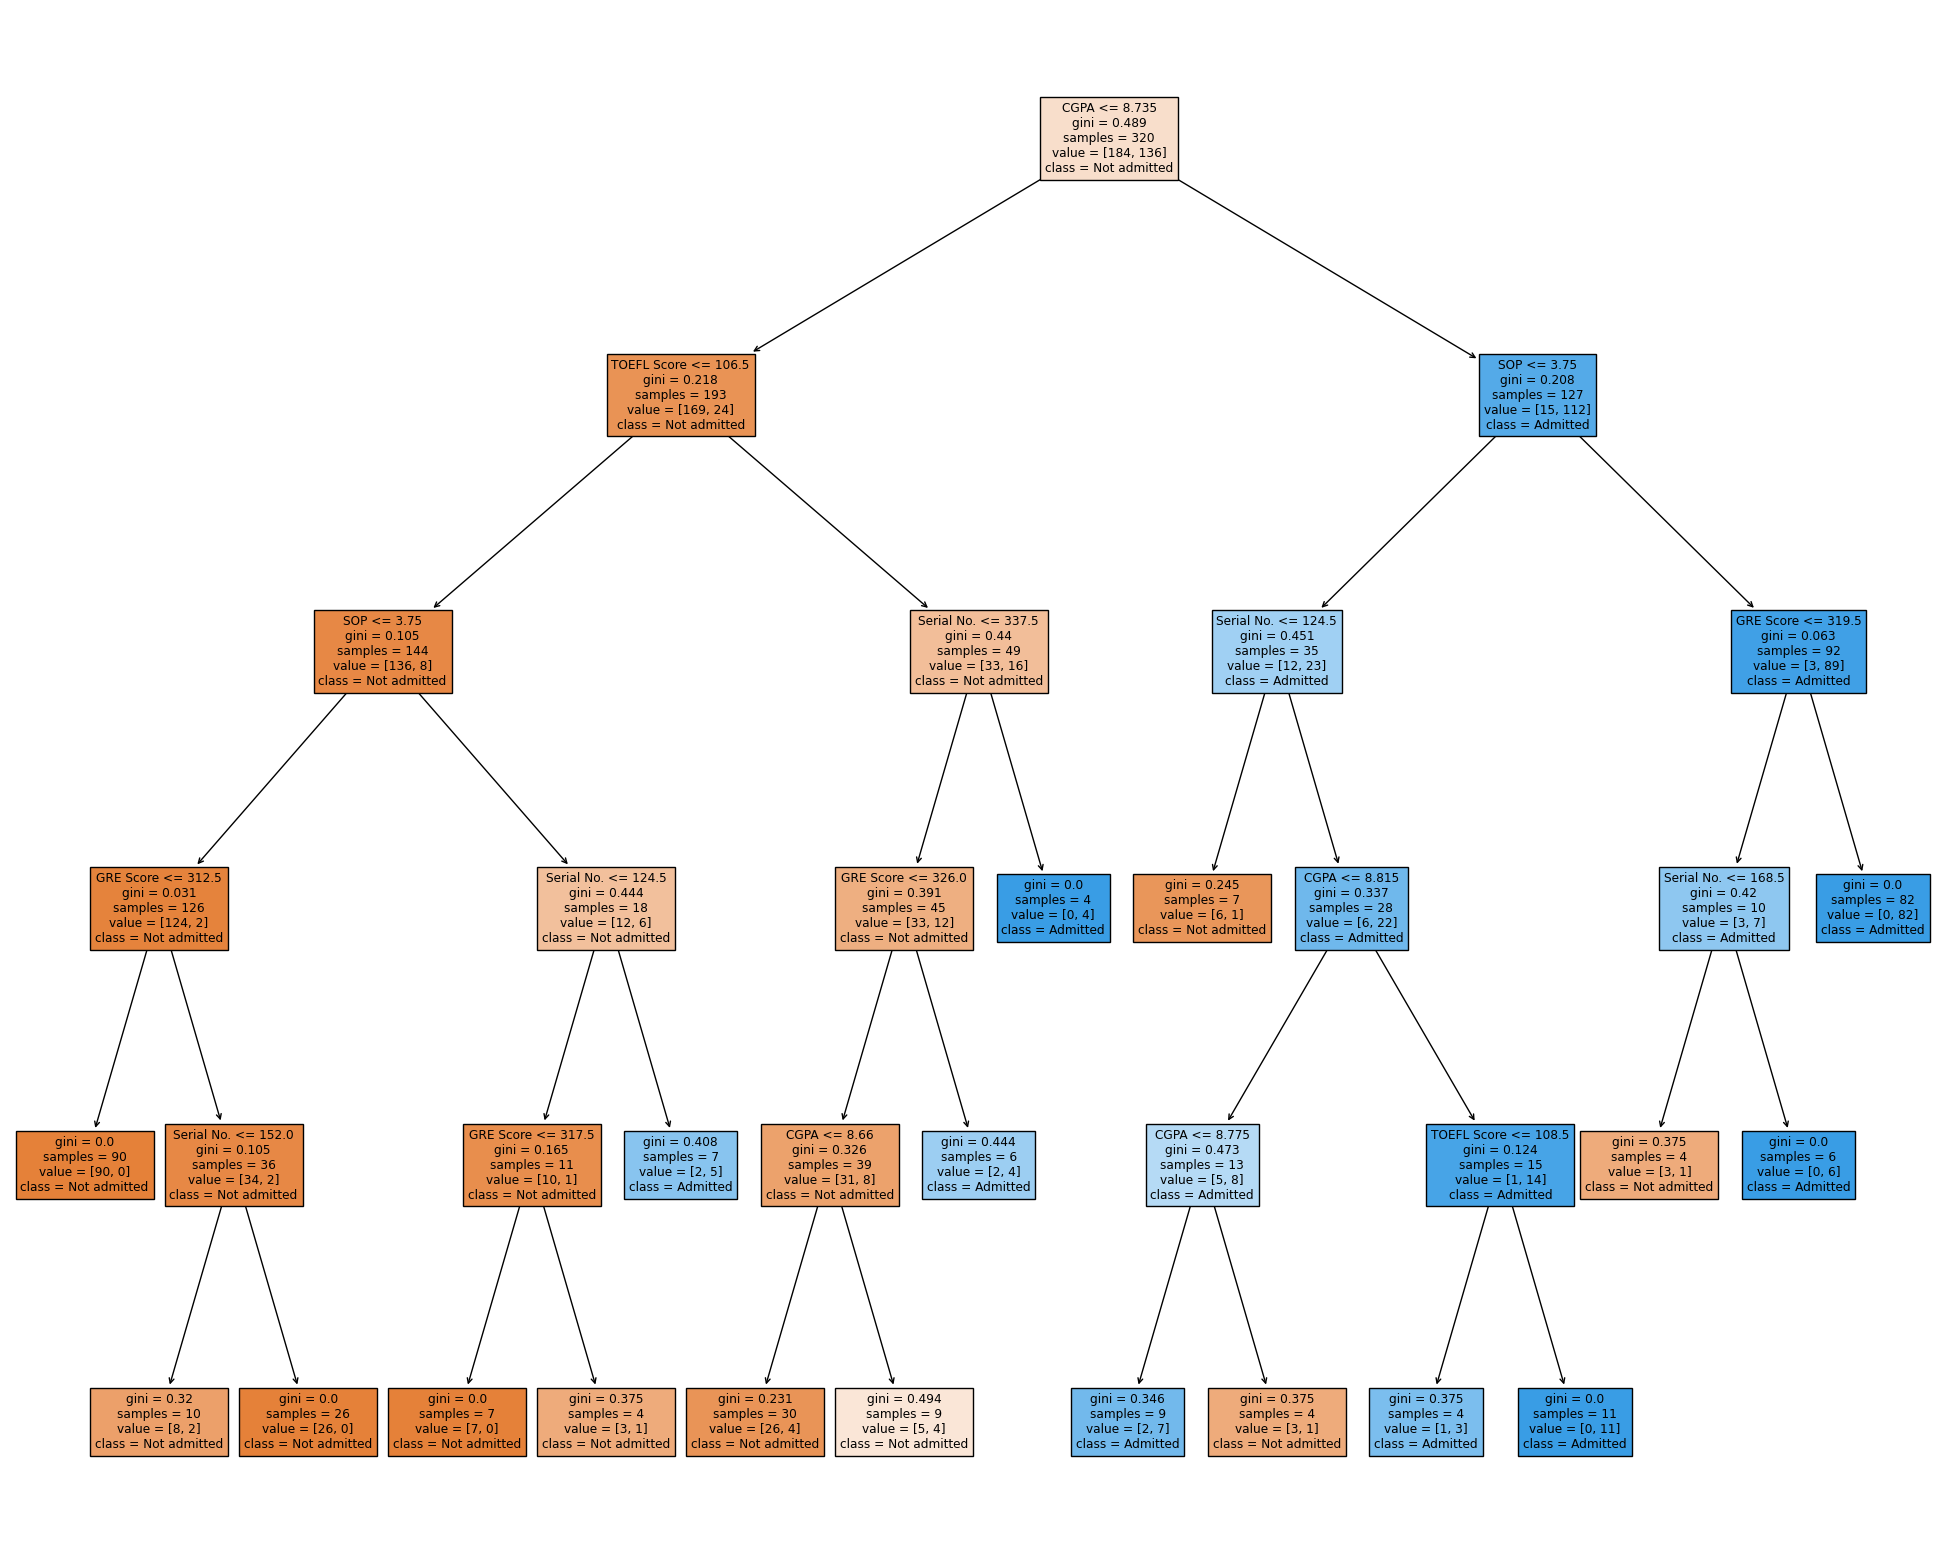

In [95]:
get_dt_graph(best, X_train)